# Supermarket Ordering Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

#### Importing tables

In [2]:
orders = pd.read_csv(r'D:\Neuer Ordner\archive\OrderLeads.csv')

#### Checking the shape, missing values and column types of the dataframe.


In [192]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order Id      100000 non-null  object        
 1   Company Id    100000 non-null  object        
 2   Company Name  100000 non-null  object        
 3   Date          100000 non-null  datetime64[ns]
 4   Order Value   100000 non-null  int64         
 5   Converted     100000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ MB


##### #There is no missing values in the dataframe, but we need to modify the 'Date' column type.

In [ ]:
orders.head()

In [ ]:
orders.tail()

#### Changing the 'Date' columns to dt formate.


In [21]:
orders["Date"] = pd.to_datetime(orders['Date'])
orders["Date"] = pd.to_datetime(orders['Date'], format="%D/%M/%Y")

#### Creating a copy of the dataframe and seplit 'Date' into year and month.

In [22]:
orders_mod = orders.copy()
orders_mod['year'] = pd.DatetimeIndex(orders['Date']).year
orders_mod['month'] = pd.DatetimeIndex(orders['Date']).month

#### Checking duplicates

In [5]:
duplicated = orders_mod[orders_mod.duplicated()]

duplicated

,Order Id,Company Id,Company Name,Date,Order Value,Converted


## Identifying the most profitable customer segment based on order value and converted sales.

#### Understanding the measure of centers of the 'Order Value' to segment.

In [25]:
orders_mod.loc[:,['Company Name', 'Order Value']].groupby('Company Name').sum().describe()

,Order Value
count,4725.000000
mean,106917.668783
std,26697.565203
min,31550.000000
25%,88174.000000
50%,105503.000000
75%,124485.000000
max,213715.000000


#### Creating 4 segments based on total orders value.
    
<ul style=“list-style-type:circle”> 

<li>from Fourth Quartile == Prime</li>
<li>from Third Quartile == Platinum</li>
<li>from Second Quartile == Gold</li>
<li>from First Quartile == Silver</li>
  
</ul>


In [26]:

Segment = orders_mod.loc[:,['Company Name', 'Order Value']].groupby('Company Name').sum()


conditions = [
    (Segment['Order Value'] >= 124485),
    (Segment['Order Value'] >= 105503) & (Segment['Order Value'] < 124485),
    (Segment['Order Value'] >= 88174) & (Segment['Order Value'] < 105503),
    (Segment['Order Value'] < 88174)
                 ]

values = ['Prime', 'Platinum', 'Gold', 'Silver']

Segment['Segment'] = np.select(conditions, values)
Segment = Segment.rename(columns={'Order Value': 'Total Order Value', 'Segment' : 'Segment'})

##add the column to the orders_mod
orders_mod = orders_mod.merge(Segment, on=['Company Name'], how='left')

In [27]:
Segment

,Total Order Value,Segment
Company Name,,
'48 Wills,65325,Silver
10-Day Causes,85473,Silver
10-Hour Leak,83021,Silver
10-Year $2.30/Mbf,120343,Platinum
10-Year-Old Alba,97968,Gold
...,...,...
Youngish Mark'S,126855,Prime
Youthful Pace-Setter,106882,Platinum
Yugoslav Retina,131929,Prime


#### Checking the total converted orders for each customer.

In [28]:
converted_sales_count = orders_mod.loc[:,['Company Name', 'Converted']].groupby('Company Name').sum()

##adding the converted sales count column to orders_mod
converted_sales_count = converted_sales_count.rename(columns={'Converted': 'Converted Sales Count'})
orders_mod = orders_mod.merge(converted_sales_count, on=['Company Name'], how='left')

In [29]:
converted_sales_count

,Converted Sales Count
Company Name,
'48 Wills,1
10-Day Causes,2
10-Hour Leak,1
10-Year $2.30/Mbf,4
10-Year-Old Alba,6
...,...
Youngish Mark'S,5
Youthful Pace-Setter,5
Yugoslav Retina,3


#### Creating a column to calculate the value of converted sales for each customers.

In [30]:
Converted_sales_value = orders_mod.drop(orders_mod[(orders_mod.Converted == 0)].index)
Converted_sales_value = Converted_sales_value.loc[:,['Company Name', 'Order Value']].groupby('Company Name').sum()
Converted_sales_value = Converted_sales_value.rename(columns={'Order Value':'Total Converted Sales'})

##adding it to orders_mod table
orders_mod = orders_mod.merge(Converted_sales_value, on=['Company Name'], how='left')


In [31]:
Converted_sales_value

,Total Converted Sales
Company Name,
'48 Wills,5441
10-Day Causes,6463
10-Hour Leak,6775
10-Year $2.30/Mbf,20194
10-Year-Old Alba,36621
...,...
Youngish Mark'S,12477
Youthful Pace-Setter,16420
Yugoslav Retina,15573


In [32]:
orders_mod

,Order Id,Company Id,Company Name,Date,Order Value,Converted,year,month,Total Order Value,Segment,Converted Sales Count,Total Converted Sales
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,2017,2,94360,Gold,2,10051.0
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,2015,7,94360,Gold,2,10051.0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,2016,5,94360,Gold,2,10051.0
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,2018,9,94360,Gold,2,10051.0
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,2016,1,94360,Gold,2,10051.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,E4K99D4JR9E40VE1,Fierce Productivity,2015-07-25,4851,0,2015,7,71000,Silver,2,7104.0
99996,K1UP23P8SIY1YION,E4K99D4JR9E40VE1,Fierce Productivity,2015-08-24,7868,0,2015,8,71000,Silver,2,7104.0
99997,NKHFWT5I2J9LPAPG,E4K99D4JR9E40VE1,Fierce Productivity,2017-06-09,5138,0,2017,6,71000,Silver,2,7104.0
99998,OF79M3H9C44UM6PO,E4K99D4JR9E40VE1,Fierce Productivity,2015-10-29,2036,0,2015,10,71000,Silver,2,7104.0


#### Rearranging the columns.

In [33]:
orders_mod.columns

Index(['Order Id', 'Company Id', 'Company Name', 'Date', 'Order Value',
       'Converted', 'year', 'month', 'Total Order Value', 'Segment',
       'Converted Sales Count', 'Total Converted Sales'],
      dtype='object')

In [34]:
orders_mod = orders_mod.loc[:,['Order Id', 'Company Id', 'Company Name', 'Segment', 
                               'Date', 'year', 'month', 
                               'Order Value', 'Total Order Value',
                               'Converted', 'Converted Sales Count', 'Total Converted Sales']]

#### Creating a new table aggregated from 'orders_mod'.


In [35]:
customers = orders_mod.loc[:,['Company Id', 'Company Name', 
                               'Segment', 'Total Order Value',
                              'Converted Sales Count', 'Total Converted Sales']]

customers = customers.drop_duplicates(subset = "Company Name")

In [36]:
customers

,Company Id,Company Name,Segment,Total Order Value,Converted Sales Count,Total Converted Sales
0,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,Gold,94360,2,10051.0
22,36MFTZOYMTAJP1RK,Tangential Sheds,Prime,132369,5,30172.0
42,H3JRC7XX7WJAD4ZO,Two-Mile Grab,Gold,93723,6,40244.0
59,HB25MDZR0MGCQUGX,Three-Men-And-A-Helper Congo'S,Prime,130079,3,14407.0
85,7RVA8TIVBLBXMNO4,Biophysical Battleground,Gold,94859,2,9117.0
...,...,...,...,...,...,...
99901,4JW3GG4YW52M86F5,Jammed-Together Stable,Platinum,106978,3,12670.0
99924,R0KV9HJ7RIRRYSVG,Laureate Barbital,Gold,99466,3,12089.0
99945,5K17HYJQ6JG6UFU0,Spotty Adoniram,Gold,98650,2,9786.0
99964,FC1LJXHNH2883N3Y,Physicochemical Impatience,Platinum,111881,2,6886.0


In [37]:
customers.info()

## There is 126 null values in Total Converted Sales

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4725 entries, 0 to 99984
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Id             4725 non-null   object 
 1   Company Name           4725 non-null   object 
 2   Segment                4725 non-null   object 
 3   Total Order Value      4725 non-null   int64  
 4   Converted Sales Count  4725 non-null   int64  
 5   Total Converted Sales  4599 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 258.4+ KB


#### Filtering the missing values to have closer look.

In [ ]:
##we have 126 customer with 0 converted sales

customers_null = customers[customers['Total Converted Sales'].isnull()]

customers_null

#### Understanding general statistics of 'customers'.

In [38]:
customers.describe()

,Total Order Value,Converted Sales Count,Total Converted Sales
count,4725.000000,4725.000000,4599.000000
mean,106917.668783,3.604021,18554.991302
std,26697.565203,1.900250,10739.229677
min,31550.000000,0.000000,110.000000
25%,88174.000000,2.000000,10515.000000
50%,105503.000000,3.000000,17153.000000
75%,124485.000000,5.000000,24867.500000
max,213715.000000,14.000000,77323.000000


In [39]:
##check number of companies in each segment
customers.loc[:,['Segment','Company Name']].groupby('Segment').count()

,Company Name
Segment,
Gold,1181
Platinum,1181
Prime,1182
Silver,1181


In [40]:
##check the profit gained from each segment
customers.loc[:,['Segment', 'Total Order Value']]\
        .groupby('Segment').sum().sort_values('Total Order Value', ascending = False)

,Total Order Value
Segment,
Prime,167773725
Platinum,135362011
Gold,114657847
Silver,87392402


#### Finding the most profitable customer segment.


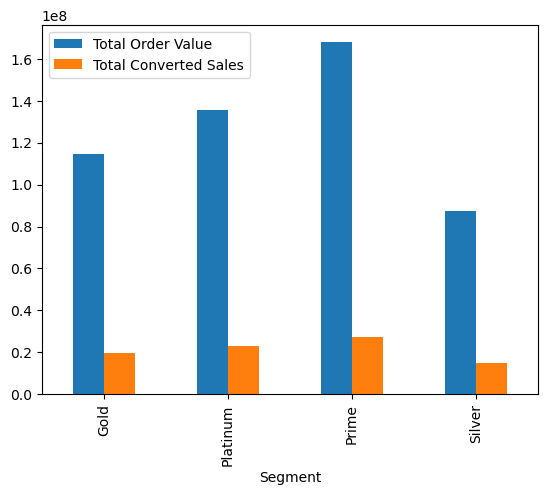

In [41]:
customers.loc[:,['Segment', 'Total Order Value', 'Total Converted Sales' ]]\
           .groupby('Segment').sum().plot(kind='bar' )
plt.show()

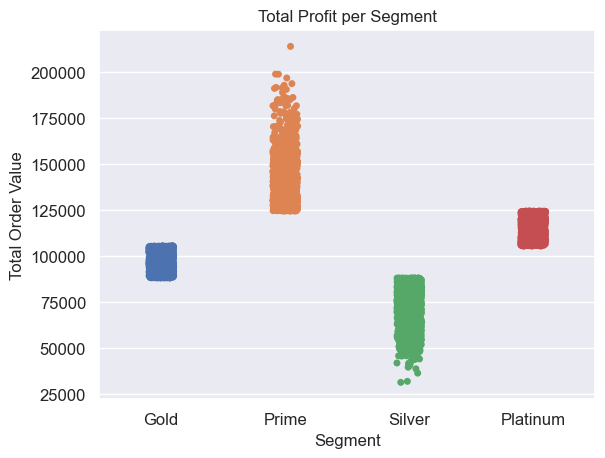

In [281]:
ax = sb.stripplot(data=customers, 
                  x='Segment', 
                  y='Total Order Value',).set(title = 'Total Profit per Segment', 
                                    )

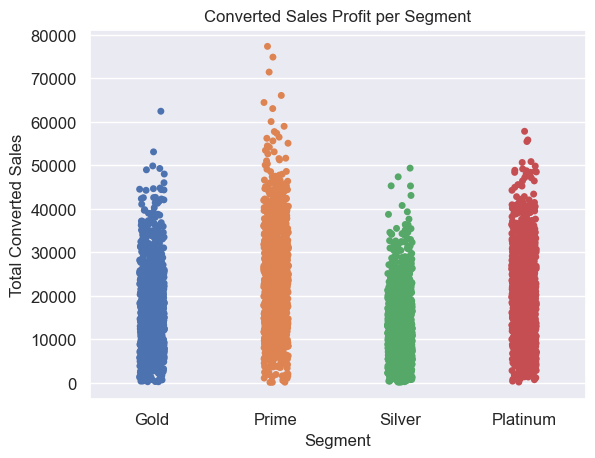

In [283]:
ax = sb.stripplot(data=customers, 
                  x='Segment', 
                  y="Total Converted Sales",).set(title = 'Converted Sales Profit per Segment', 
                                    )

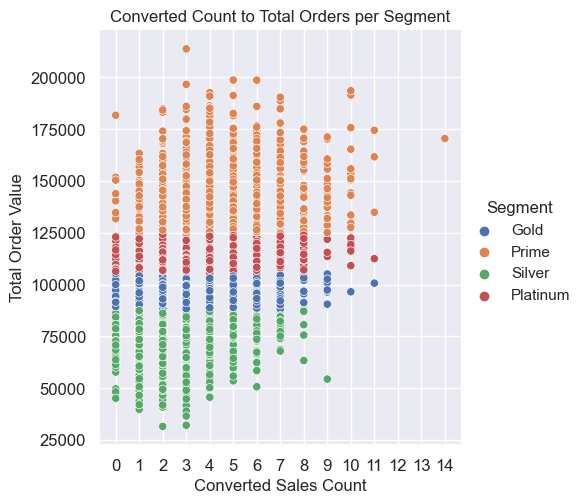

In [285]:
sb.relplot(data=customers, 
           y="Total Order Value", 
           x="Converted Sales Count",
           hue="Segment",).set(title = 'Converted Count to Total Orders per Segment',  xticks = (range(0,15))
                                    )

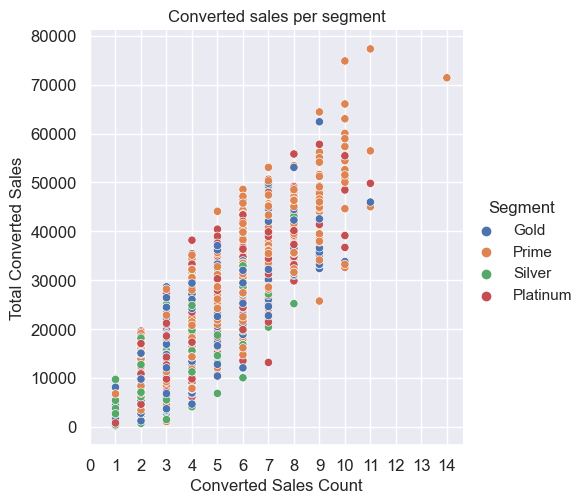

In [287]:
sb.relplot(data=customers,
           y="Total Converted Sales", 
           x="Converted Sales Count", 
           hue="Segment",).set(title = 'Converted sales per segment', xticks = (range(0,15))
                                    )

### Analyzing the conversion rate of orders over time.

#### Average Conversion Ratio in each year.

In [194]:
orders_mod.loc[:,['year', 'Converted']]\
      .groupby('year').sum() / orders_mod.loc[:,['year', 'Converted']]\
                                      .groupby('year').count() * 100

,Converted
year,
2014,19.284145
2015,19.466626
2016,18.852211
2017,15.158778
2018,12.459811


#### Average Conversion Ratio in each month.

In [121]:
orders_mod.loc[:,['month', 'Converted']]\
      .groupby('month').sum() / orders_mod.loc[:,['month', 'Converted']]\
                                      .groupby('month').count() * 100

,Converted
month,
1,17.397882
2,17.533770
3,17.368297
4,17.159907
5,17.549435
6,17.600775
7,16.614274
8,16.704235
9,16.304480


#### Detailed Conversion ratio from Jan. 2014 to Dec. 2018.

In [191]:
Conversion_Ratio = orders_mod.loc[:,['year', 'month', 'Converted']] \
                         .groupby(['year', 'month']).sum() / orders_mod.loc[:,['year', 'month','Converted']] \
                                                                   .groupby(['year', 'month']).count() * 100
 
Conversion_Ratio

Converted
year month           
2014 1      17.664493
     2      18.400000
     3      19.794810
     4      19.927317
     5      20.303384
     6      20.107720
     7      18.831537
     8      20.000000
     9      19.670128
     10     20.382546
     11     18.247299
     12     18.049913
2015 1      20.072771
     2      20.471380
     3      19.053052
     4      18.699690
     5      20.048164
     6      19.830713
     7      20.477022
     8      19.316239
     9      18.377693
     10     17.777778
     11     20.470439
     12     19.158613
2016 1      19.751626
     2      17.811013
     3      18.965517
     4      19.181429
     5      18.607443
     6      20.706758
     7      16.958042
     8      18.321513
     9      17.820590
     10     19.499106
     11     19.007264
     12     19.588875
2017 1      17.183099
     2      18.374091
     3      15.780245
     4      16.686532
     5      16.083086
     6      14.984520
     7      13.641827
     8      13.592233
     9      13.622844
     10     15.540541
     11     13.409091
     12     13.233533
2018 1      12.674484
     2      12.665782
     3      13.286302
     4      11.288344
     5      12.937853
     6      12.529274
     7      13.028373
     8      11.982968
     9      12.261905
     10     12.135356
     11     12.059012
     12     12.549020

#### Checking the distripution of the Conversion rate during the timeframe we have.

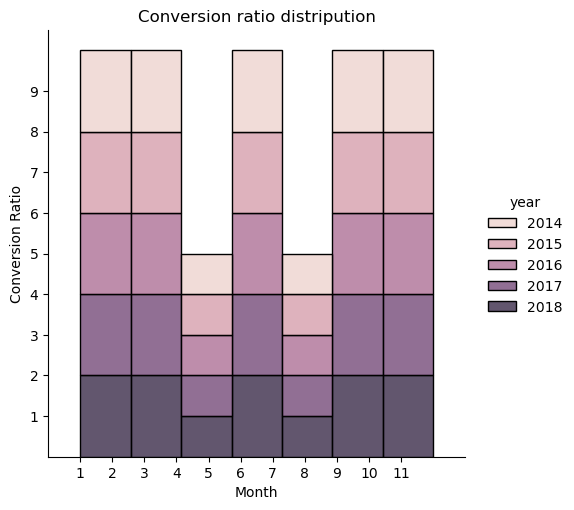

In [256]:
sb.displot(data=Conversion_Ratio, 
           x="month", hue="year",
           multiple='stack',).set (title = 'Conversion ratio distripution', 
                                    ylabel = 'Conversion Ratio',  yticks = (range(1,10)),
                                    xlabel = 'Month', xlim = (0,13), xticks = (range(1,12)))

#### Checking the change of the Conversion ratio during the timeframe we have from diffrent prespectives.

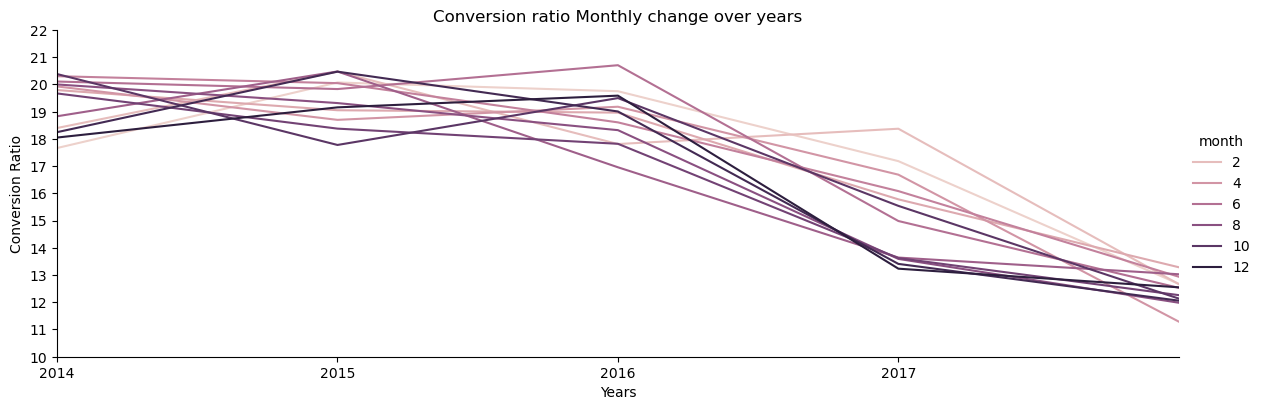

In [248]:
sb.relplot(data=Conversion_Ratio,
           x="year", 
           y='Converted',
           hue="month",
           kind="line",
           height=4, aspect=3,).set(title = 'Conversion ratio Monthly change over years', 
                                    ylabel = 'Conversion Ratio',  yticks = (range(10,23)),
                                    xlabel = 'Years', xlim = (2014, 2018), xticks = (range(2014,2018)))

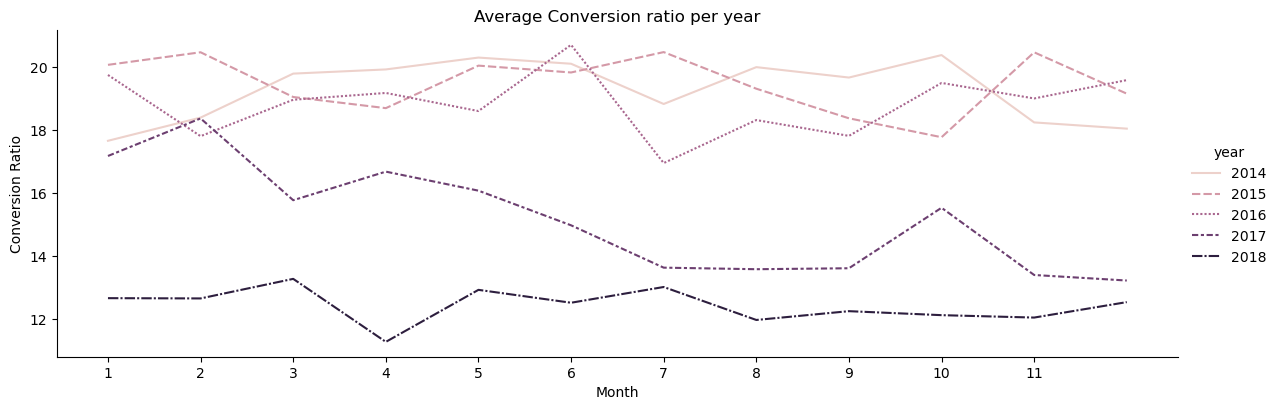

In [234]:
 Avg = sb.relplot(data=Conversion_Ratio,
           hue= 'year',
           style="year", 
           y='Converted', 
           x="month", 
           kind="line",
           height=4, aspect=3,).set(title = 'Average Conversion ratio per year', 
                                    ylabel = 'Conversion Ratio',
                                    xlabel = 'Month', xticks = (range(1,12)))
